In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

        
A. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
        
    One major issue is the appearances of outliers. One store (shop_id=42) had 17 different orders, by the same user (user_id=607), purchasing 2000 items/sneakers totaling in $704,000 (max order amount) each transaction. The Outliers results in a severely skewed average.

    Option 1: We can get the Trimmed Mean (remove some outliers based on a set percentage then calcuate the average), averages are highly affected by an outlier. Safest bets would be to work in between the 1st quartile (anything 163.0 or more) and 4th quartile (anything 390.0 or less). Although this can help in this situation those data points can still be useful in other use cases. So removal, at this point, is not optimal. 

    Option 2: [Most Easy] We can use different metrics to measures of central tendencies. (Median = the "middle" most value and Mode = most frequent value)


B. What metric would you report for this dataset?

    I would use $Median$ instead of Average. The sweet spot with numerical data is in between the 2nd and the 3rd quartiles. And right smack in the middle (at 50%) is the Median, the "middle" most value.

    Mode (Frequency or most occurring value) is another viable option, but the mode=153 (with 87 occurences) is lower then the 25th percentile.

C. What is its value?

    df[['order_amount']].median() = 284.00

In [2]:
# Load data into pandas DataFrame
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
df.describe(include='all')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,3,4991
top,NaN,NaN,NaN,NaN,NaN,credit_card,2017-03-28 4:00:00
freq,NaN,NaN,NaN,NaN,NaN,1735,3
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,NaN,NaN
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,NaN,NaN
min,1.000000,1.000000,607.000000,90.000000,1.00000,NaN,NaN
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,NaN,NaN
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,NaN,NaN
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,NaN,NaN


In [5]:
# Checking for null values
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

# A) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

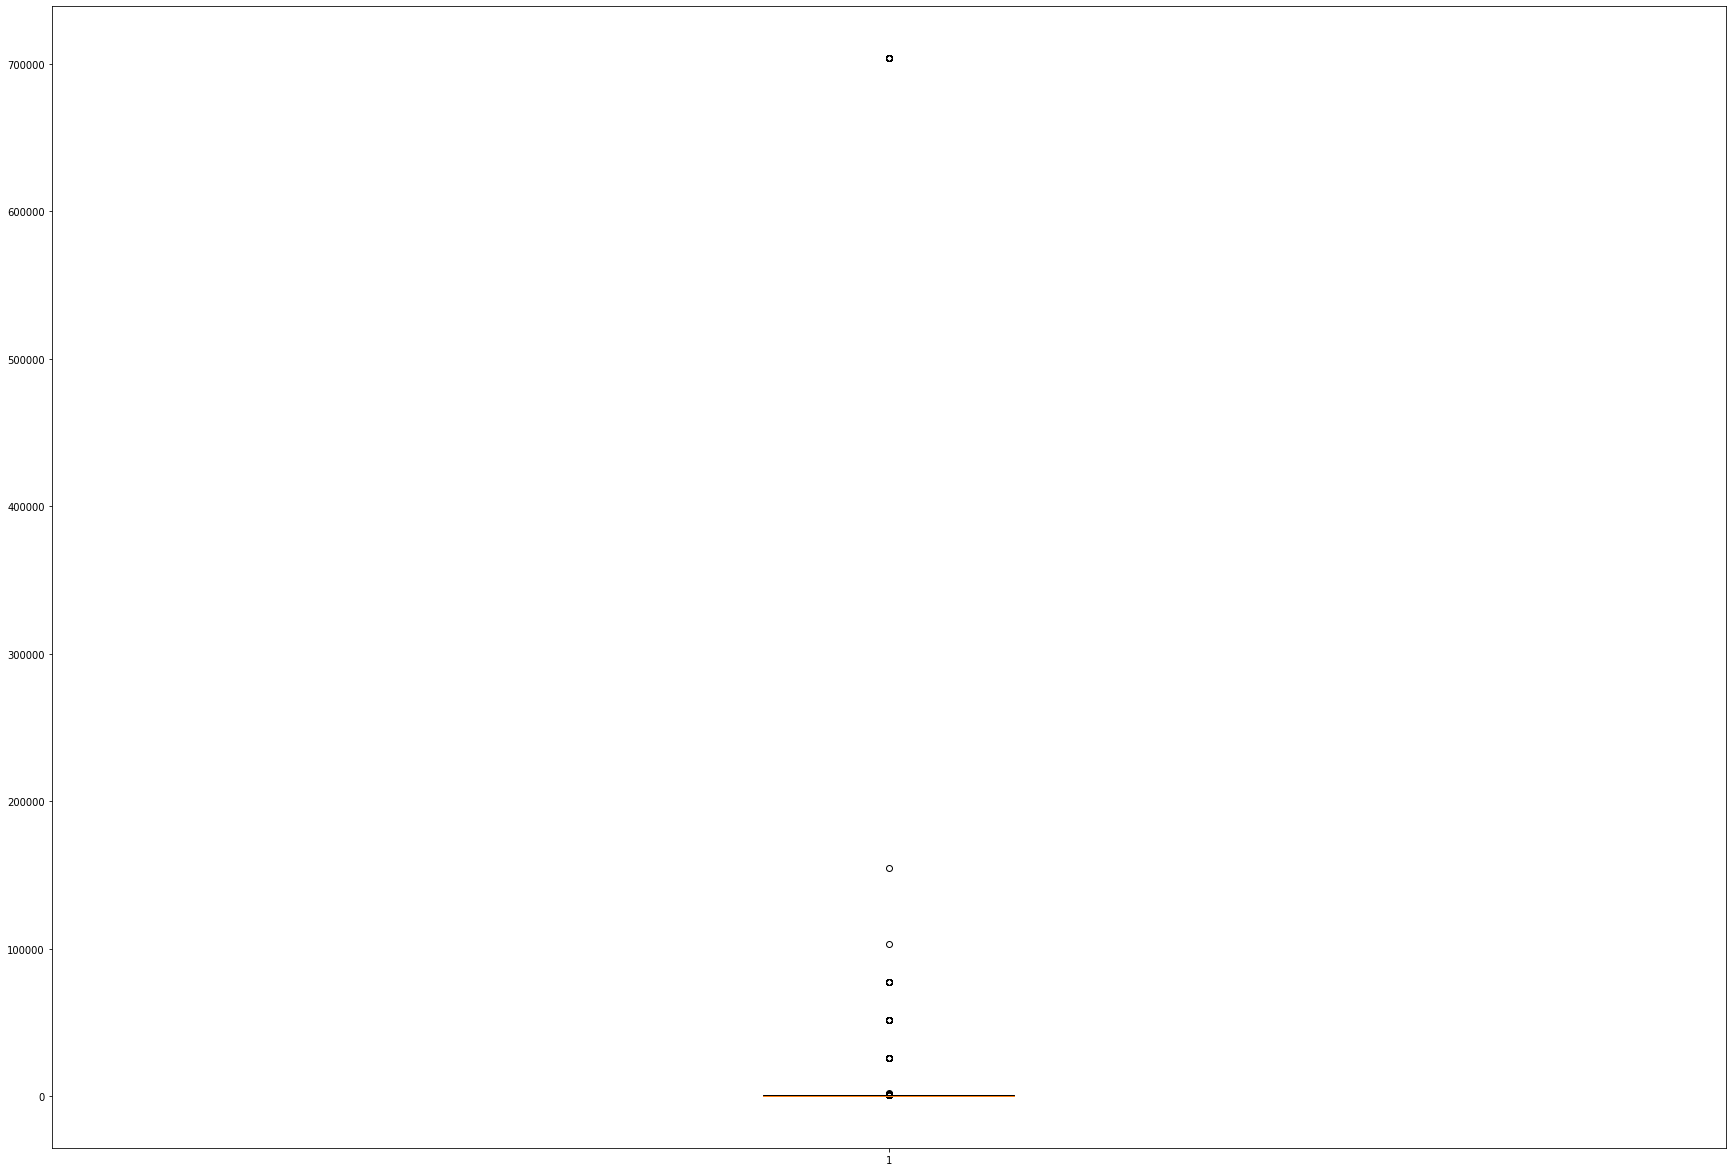

In [6]:
fig = plt.figure(figsize =(30, 21))
 
# Creating plot
plt.boxplot(df.order_amount)
 
# show plot
plt.show()

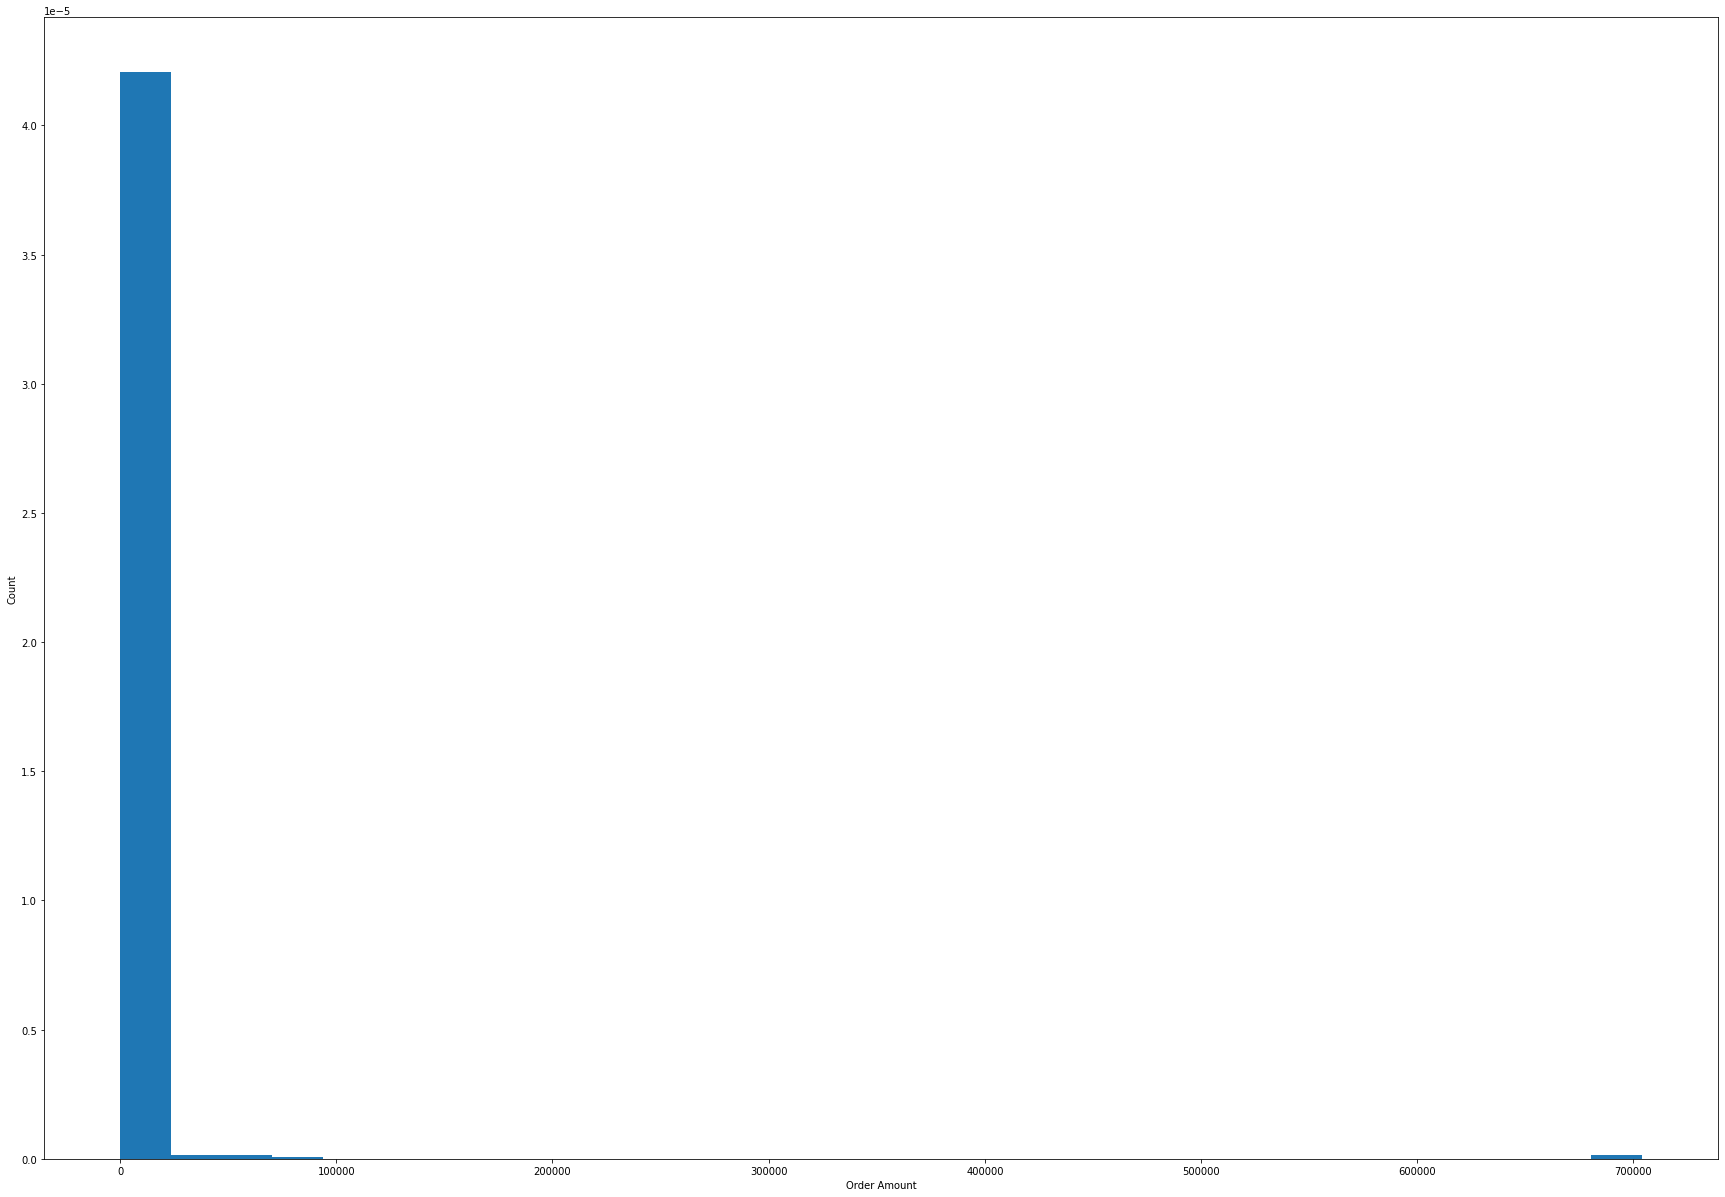

In [7]:
fig = plt.figure(figsize =(30, 21))
plt.hist(df.order_amount, density=True, bins=30)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Order Amount');
# show plot
plt.show()

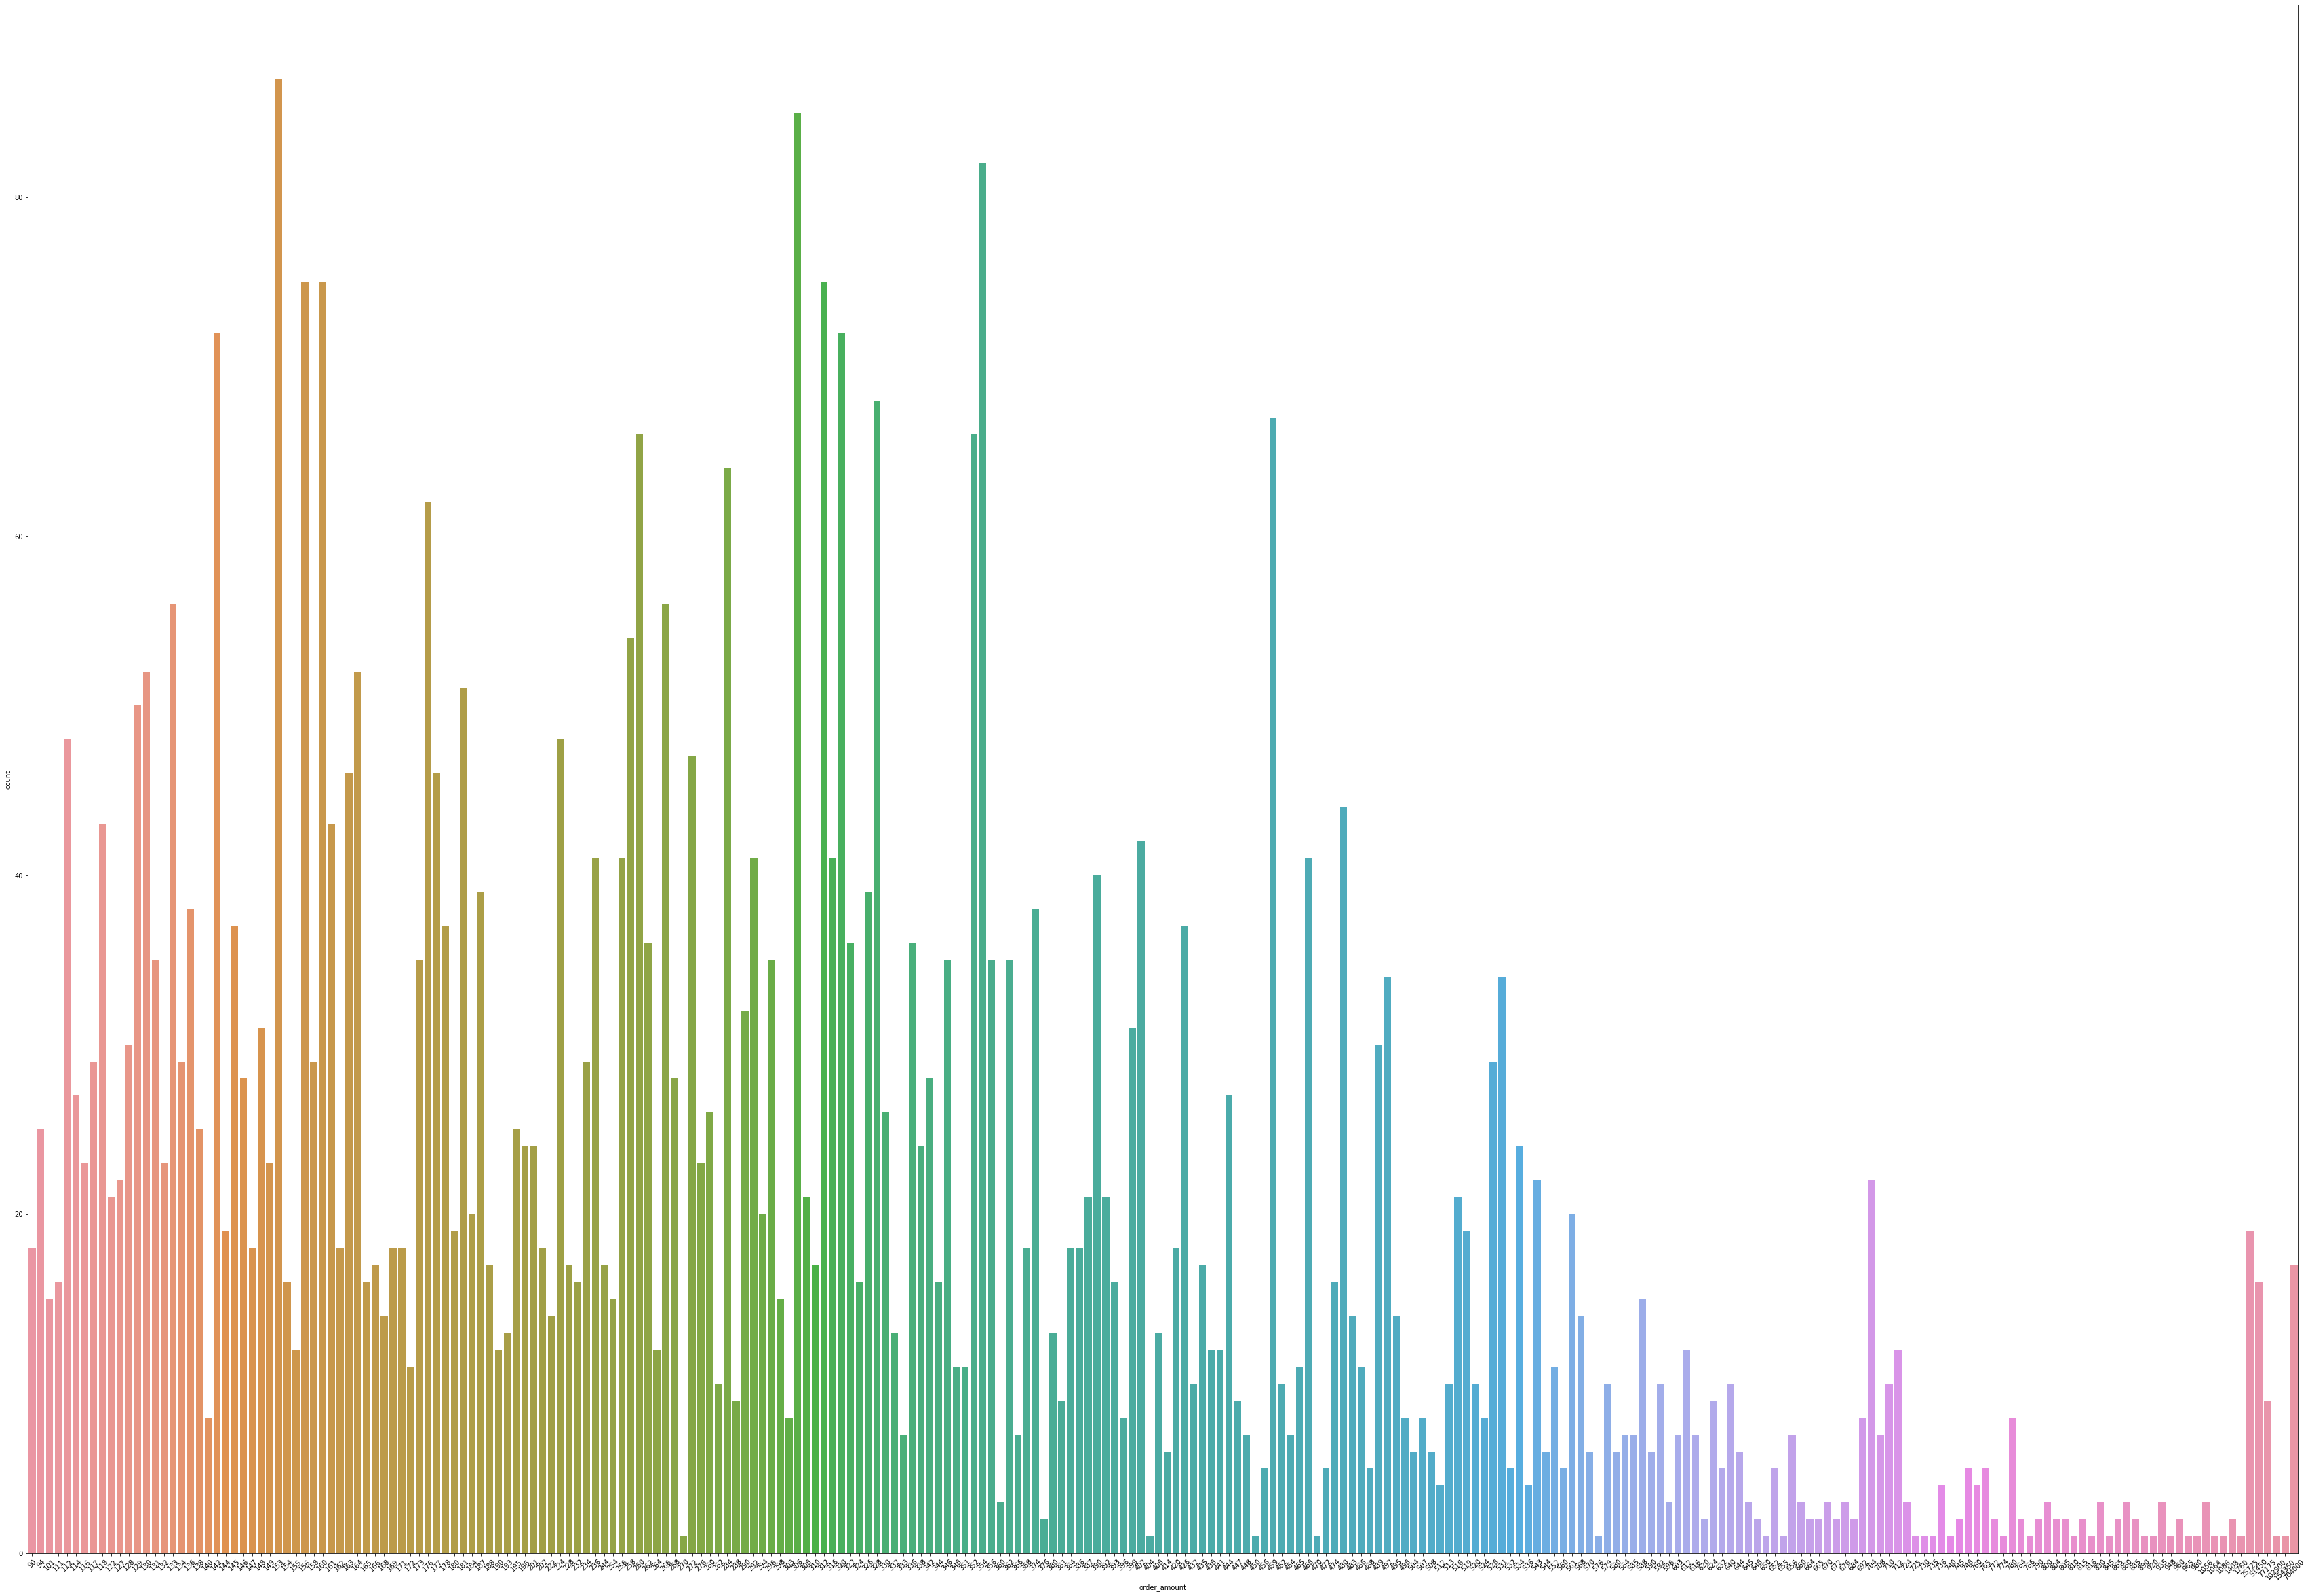

In [8]:
import seaborn as sns


fig = plt.figure(figsize =(60, 42))
# count plot on single categorical variable
sns.countplot(x ='order_amount', data = df,)
 
# Show the plot
plt.xticks(rotation=45)
plt.show()

C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_amount', ylabel='Density'>

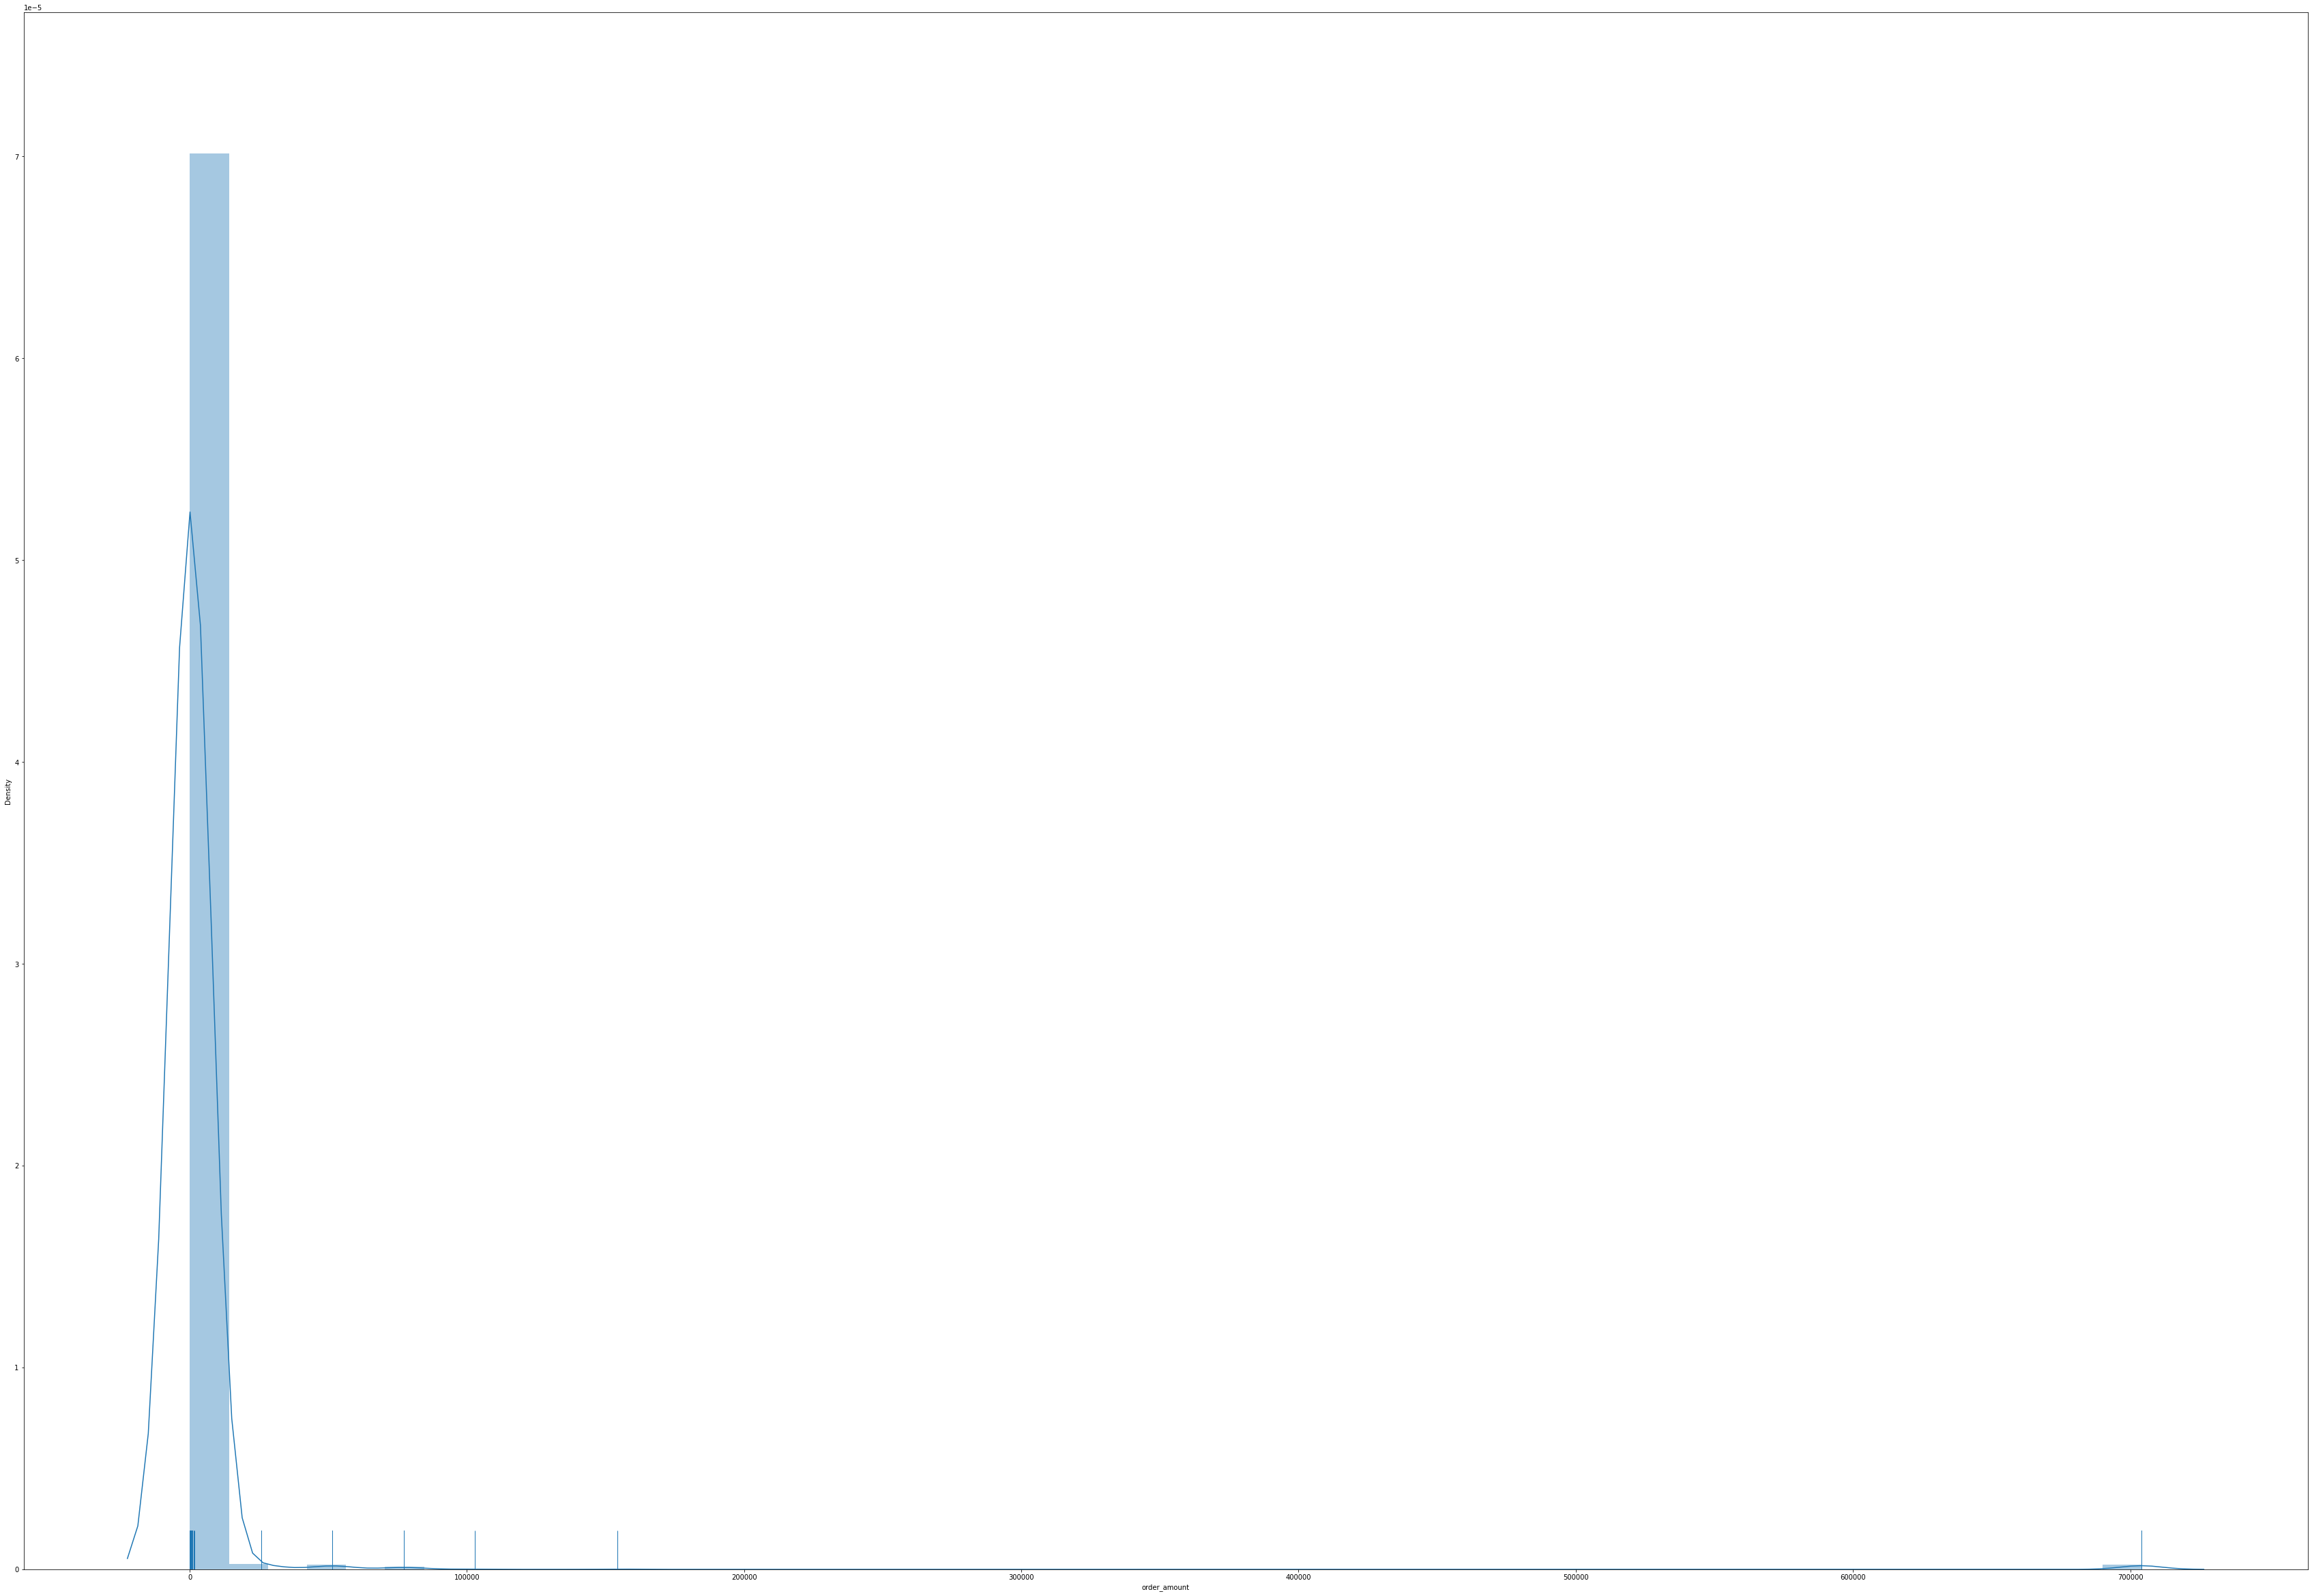

In [9]:
fig = plt.figure(figsize =(60, 42))
sns.distplot(df.order_amount, rug=True)

In [10]:
# Find the range of order amounts
df.order_amount.sort_values()

158         90
3871        90
4760        90
4923        90
4932        90
         ...  
2153    704000
1562    704000
1362    704000
520     704000
3332    704000
Name: order_amount, Length: 5000, dtype: int64

In [11]:
df_groupby_avg = df.groupby('shop_id', as_index=False)['order_amount'].mean()
df_groupby_avg['order_amount'].sort_values(ascending=False)

41    235101.490196
77     49213.043478
49       403.545455
89       403.224490
37       390.857143
          ...      
52       214.117647
99       213.675000
31       189.976190
1        174.327273
91       162.857143
Name: order_amount, Length: 100, dtype: float64

In [12]:
# Find all orders with the maximum order amounts
df.loc[df.order_amount == 704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


## Trimmed Mean

In [13]:
from scipy import stats

#calculate 10% trimmed mean
stats.trim_mean(df['order_amount'], 0.1)   # removing top and bottom 10% of the data (some outliers)

287.39075

In [14]:
stats.trim_mean(df['order_amount'], 0.05)   # removing top and bottom 5% of the data (some outliers)

294.3933333333333

In [15]:
stats.trim_mean(df['order_amount'], 0.025)   # removing top and bottom 2.5% of the data (some outliers)

300.23431578947367

## Weighted Mean

In [16]:
# Getting scaled values in order_amount column
from sklearn.preprocessing import minmax_scale

df['order_amount_scaled'] = minmax_scale(df['order_amount'])
df


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount_scaled
0,1,53,746,224,2,cash,2017-03-13 12:36:56,0.000190
1,2,92,925,90,1,cash,2017-03-03 17:38:52,0.000000
2,3,44,861,144,1,cash,2017-03-14 4:23:56,0.000077
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,0.000094
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,0.000094
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,0.000341
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,0.000205
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,0.000371
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,0.000375


In [17]:
# Weighted average where the larger the number the lower the weight
g = df.groupby('order_amount')
weights = (1-df['order_amount_scaled'])
(df.order_amount / g.order_amount.transform("sum") * (weights)).sum()


256.2889716014831

# B) What metric would you report for this dataset?.

## Mode

In [18]:
# Find most Frequent order amount
df[['order_amount']].mode()

,order_amount
0,153


In [19]:
# Find most Frequent order amount (top 5 values)
pd.DataFrame(df[['order_amount']].value_counts()).head().rename(columns={0:'Frequency'})

,Frequency
order_amount,
153,87
306,85
354,82
312,75
160,75


## Median, Mean, Min, Max

In [20]:
# Find the median, average, minimum, and maximum values of  all order amount
df.order_amount.agg(['median','mean','min','max',])

median       284.000
mean        3145.128
min           90.000
max       704000.000
Name: order_amount, dtype: float64

In [21]:
aov_per_store = pd.DataFrame(df.order_amount.groupby(df['shop_id']).mean())
display(aov_per_store)

,order_amount
shop_id,
1,308.818182
2,174.327273
3,305.250000
4,258.509804
5,290.311111
...,...
96,330.000000
97,324.000000
98,245.362069


# C) What is its value?

median = 284.000

In [22]:
df[['order_amount']].median()

order_amount    284.0
dtype: float64